### Objective:

To manually generate embeddings for a set of articles which are part of the mongo db to kick start the clustering process

Part 2:

- 22k embeddings already present in the table
- 1.5k more added
- some 80% are not financial - many of which are identified using the url category

process:
- loading all articles exported from mongo
- get articles for which embeddings already created
- identify financial articles and remove embeddings for non financial from table

In [1]:
parent_folder = '/Users/ravi.tej/Desktop/ML/Recommendations/cambrian/'
data_folder = parent_folder + 'data/'
from hydra import compose, initialize
with initialize(config_path="../../conf"):
    # Compose the configuration
    cfg = compose(config_name="TopicClusterMapping.yaml")

import os

import xml.etree.ElementTree as ET

tree = ET.parse('../../conf/application.run.xml')
root = tree.getroot()

envs_element = root.find('./configuration/envs')
for variable in envs_element.findall('env'):
    name = variable.get('name')
    value = variable.get('value')
    os.environ[name] = value

/var/folders/d4/cgyr_gnj7nn2wy_hq40gkq8c0000gq/T/ipykernel_21080/4032682437.py:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="../../conf"):


In [2]:
import sys

sys.path.append('/Users/ravi.tej/Desktop/ML/Recommendations/cambrian/')

from src.embeddings.EmbeddingsService import EmbeddingsService
from sql.embeddings.EmbeddingSQL import EmbeddingSQL

import json

In [3]:
from sql.PostgresDatabaseOperation import PostgresDatabaseOperation

In [4]:
import pandas as pd

In [6]:
with PostgresDatabaseOperation() as cursor:
    sql = "SELECT DISTINCT article_id FROM embeddings"
    cursor.execute(sql)
    res = cursor.fetchall()

In [8]:
computed_embedding_articles_df = pd.DataFrame(res, columns = ['article_id'])

In [12]:
all_articles_df = pd.read_csv(data_folder + 'et_non_premium_articles_12_oct.csv')

/var/folders/d4/cgyr_gnj7nn2wy_hq40gkq8c0000gq/T/ipykernel_21080/1120521040.py:1: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  all_articles_df = pd.read_csv(data_folder + 'et_non_premium_articles_12_oct.csv')


In [14]:
all_articles_df

,_id,url,published_time,source_id,authors[0],_class,image_url,is_premium_article,last_updated_time,short_description,...,tags[15],tags[16],tags[17],tags[18],tags[19],tags[20],tags[21],tags[22],tags[23],title
0,6527615f50af0e25a9122f15,https://economictimes.indiatimes.com/news/inte...,2023-10-12T07:18:00+05:30,6512cdcad01a9c8e86263e05,The Feed,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-10-12T07:18:00+05:30,"The survey encompassed over 9,000 American tee...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YouTube passes Netflix as top choice for video...
1,6527616b50af0e25a9122f3a,https://economictimes.indiatimes.com/news/inte...,2023-10-12T07:18:00+05:30,6512cdcad01a9c8e86263e05,The Feed,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-10-12T07:18:00+05:30,"The survey encompassed over 9,000 American tee...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YouTube passes Netflix as top choice for video...
2,6527616b50af0e25a9122f39,https://economictimes.indiatimes.com/news/inte...,2023-10-12T07:12:00+05:30,6512cdcad01a9c8e86263e05,ANI,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-10-12T07:15:00+05:30,The Israeli Air Force has hit more than 200 ta...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airstrikes hammer Hamas targets as Israeli dea...
3,6527616750af0e25a9122f2d,https://economictimes.indiatimes.com/news/inte...,2023-10-12T07:12:00+05:30,6512cdcad01a9c8e86263e05,ANI,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-10-12T07:15:00+05:30,The Israeli Air Force has hit more than 200 ta...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airstrikes hammer Hamas targets as Israeli dea...
4,6527616450af0e25a9122f1f,https://economictimes.indiatimes.com/news/inte...,2023-10-12T07:10:00+05:30,6512cdcad01a9c8e86263e05,The Feed,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-10-12T07:10:00+05:30,McGregor suffered a brutal leg break during hi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conor McGregor closer to UFC comeback; Re-ente...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23569,651e16aba662d76276b88200,https://economictimes.indiatimes.com/news/defe...,2023-04-04T06:37:00+05:30,6512cdcad01a9c8e86263e05,AFP,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-04-04T06:42:00+05:30,Citing the head of the Odesa district military...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian drones strike Ukraine's port of Odesa:...
23570,651e1788a662d76276b88411,https://economictimes.indiatimes.com/news/defe...,2023-04-04T06:33:00+05:30,6512cdcad01a9c8e86263e05,AFP,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-04-04T06:35:00+05:30,A few MiG-29s have already been sent. They ar...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poland says supplied some of pledged MiG-29s t...
23571,651e167da662d76276b8818f,https://economictimes.indiatimes.com/news/poli...,2023-04-04T00:26:00+05:30,6512cdcad01a9c8e86263e05,PTI,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-04-04T00:28:00+05:30,Senior Congress leader and Rajya Sabha MP Digv...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Digvijaya Singh to Sue BJP Leader
23572,651e164da662d76276b88125,https://economictimes.indiatimes.com/markets/s...,2023-04-04T00:21:00+05:30,6512cdcad01a9c8e86263e05,PTI,com.wintWealth.insight.common.models.entities....,https://economictimes.indiatimes.com/thumb/msi...,False,2023-04-04T00:25:00+05:30,chairman S M Vaidya said the company's refiner...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"IOC market share climbs to 43%, posts 'stellar..."


In [16]:
SOURCE_ID_ET = '6512cdcad01a9c8e86263e05'
SOURCE_ID_LIVEMINT = '650046bd005149c49201269f'


URL_ET = 'economictimes.indiatimes.com/'
URL_LIVEMINT = 'economictimes.indiatimes.com/'

In [18]:
def extract_cat_sub_cat_from_url(row):
    # ET
    if row['source_id'] == SOURCE_ID_ET:
        source = 'et'
        cat = row['url'].split(URL_ET)[1].split('/')[0]
        sub_cat = row['url'].split(URL_ET)[1].split('/')[1]
        return source, cat, sub_cat
    # livemint
    elif row['source_id'] == SOURCE_ID_LIVEMINT:
        source = 'livemint'
        cat = row['url'].split(URL_LIVEMINT)[1].split('/')[0]
        sub_cat = row['url'].split(URL_LIVEMINT)[1].split('/')[1]
        return source, cat, sub_cat

In [15]:
def get_irrelevant_articles(df):
    df['source'], df['category'], df['sub_category'] = zip(*df.apply(extract_cat_sub_cat_from_url, axis=1))
    df['source_cat'] = df['source'] + '-' + df['category']
    df['source_sub_cat'] = df['source'] + '-' + df['category'] + '-' + df['sub_category']
    whitelisted_categories = ['et-industry', 'et-markets', 'et-nri', 'et-small-biz', 'et-wealth']
    whitelisted_sub_cats = ['et-news-company', 'et-news-economy', 'et-news-industry']
    df['is_relevant'] = df.apply(lambda x: x['source_cat'] in whitelisted_categories or x['source_sub_cat'] in whitelisted_sub_cats, axis=1)
    return df

In [19]:
all_articles_df = get_irrelevant_articles(all_articles_df)

In [22]:
len(all_articles_df)

23574

In [23]:
relevant_articles = list(all_articles_df[all_articles_df.is_relevant == True]['_id'].unique())

In [25]:
len(relevant_articles)

4533

In [41]:
all_articles_df['article_id'] = all_articles_df['_id'].astype('str')

### Adding missing embeddings for later added financial articles

In [43]:
pending_embeddings_df = all_articles_df[~all_articles_df.article_id.isin(computed_embedding_articles_df.article_id.unique())]

In [45]:
pending_embeddings_df.groupby('is_relevant')['is_relevant'].count()

is_relevant
False    562
True     124
Name: is_relevant, dtype: int64

In [46]:
import requests
import json

In [49]:
from tqdm.notebook import tqdm

In [48]:
url = "http://65.0.67.16:8000/"

In [50]:
for article_id in tqdm(pending_embeddings_df[pending_embeddings_df.is_relevant == True]['article_id'].unique()):
    r = requests.post(url + 'create_embedding', json = {'articleId': article_id})
    assert r.status_code == 200

  0%|          | 0/124 [00:00<?, ?it/s]

### Deleting non financial articles from db

In [54]:
irrelevant_articles = list(set(all_articles_df['article_id'].unique()) - set(relevant_articles))

In [65]:
with PostgresDatabaseOperation() as cursor:
    sql = 'DELETE FROM embeddings WHERE article_id NOT IN %s'
    cursor.execute(sql, (tuple(relevant_articles),))
    # res = cursor.fetchall()

### Archive - code during first run on oct 5th

In [8]:
emb = EmbeddingsService(hf_model_path='BAAI/bge-large-en-v1.5')

In [11]:
from src.embeddings._utils import get_article_metadata_from_api
from sql.PostgresDatabaseOperation import PostgresDatabaseOperation
from datetime import datetime

from tqdm.notebook import tqdm

In [22]:
def write_entry_to_candidate_articles(article_id):
    article_metadata = get_article_metadata_from_api(article_id=article_id)
    published_at = article_metadata['publishedTime']
    source_id = article_metadata['source']['sourceId']
    with PostgresDatabaseOperation() as cursor:
        insert_sql = """
            INSERT INTO candidate_articles (article_id, published_at, source_id, created_at)
            VALUES (%s, %s, %s, %s)
            ON CONFLICT (article_id) DO NOTHING;
            """
        current_time = datetime.now()
        cursor.execute(insert_sql, (article_id, published_at, source_id, current_time))

In [29]:
for article_id in tqdm(all_article_ids):
    emb.create_article_embeddings(article_id)
    write_entry_to_candidate_articles(article_id)

  0%|          | 0/22826 [00:00<?, ?it/s]

In [42]:
0.9 ** 14

0.2287679245496101

In [43]:
from sql.PostgresDatabaseOperation import PostgresDatabaseOperation

In [44]:
with PostgresDatabaseOperation() as cursor:
    sql = """
    INSERT INTO source_id_characteristics (source_id, publication_date_decay)
    VALUES (%s, %s)
    """
    cursor.execute(sql, ('6512cdcad01a9c8e86263e05', 0.9))

In [20]:
url = f"http://insight-user-app-beta-env.eba-rnrpvmin.ap-south-1.elasticbeanstalk.com/articles/651dacc4701055199ecf995e?fetchSourceInfo=true"

In [21]:
r = requests.get(url)

In [22]:
import json

In [23]:
json.loads(r.text)

{'articleId': '651dacc4701055199ecf995e',
 'url': 'https://economictimes.indiatimes.com/news/international/us/billboard-latin-music-week-2023-yng-lvcas-peso-pluma-and-grupo-frontera-mark-presence-heres-what-you-may-want-to-know/articleshow/104140976.cms',
 'title': 'Billboard Latin Music Week 2023: Yng Lvcas, Peso Pluma and Grupo Frontera mark presence. Here’s what you m',
 'shortDescription': 'Peso Pluma, Yng Lvcas and Grupo Frontera, at the Billboard Latin Music Week 2023, discussed their collaborative efforts in fueling the Mexican music revolution. They emphasized unity within the industry and highlighted their global hits, including  La Bebe (Remix)  and  Tulum.  ',
 'publishedTime': '2023-10-04T01:43:00+05:30',
 'lastUpdatedTime': '2023-10-04T01:43:00+05:30',
 'tags': ['latin music week',
  'Mexican Music',
  'peso',
  'Billboard Latin Music Week 2023',
  'Billboard Latin Music Week',
  'Billboard Latin Music',
  'yng lvcas',
  'peso pluma',
  'grupo frontera'],
 'articleImageUrl

In [19]:
get_article_metadata_from_api('651dacc4701055199ecf995e')

{'articleId': '651dacc4701055199ecf995e',
 'url': 'https://economictimes.indiatimes.com/news/international/us/billboard-latin-music-week-2023-yng-lvcas-peso-pluma-and-grupo-frontera-mark-presence-heres-what-you-may-want-to-know/articleshow/104140976.cms',
 'title': 'Billboard Latin Music Week 2023: Yng Lvcas, Peso Pluma and Grupo Frontera mark presence. Here’s what you m',
 'shortDescription': 'Peso Pluma, Yng Lvcas and Grupo Frontera, at the Billboard Latin Music Week 2023, discussed their collaborative efforts in fueling the Mexican music revolution. They emphasized unity within the industry and highlighted their global hits, including  La Bebe (Remix)  and  Tulum.  ',
 'publishedTime': '2023-10-04T01:43:00+05:30',
 'lastUpdatedTime': '2023-10-04T01:43:00+05:30',
 'tags': ['latin music week',
  'Mexican Music',
  'peso',
  'Billboard Latin Music Week 2023',
  'Billboard Latin Music Week',
  'Billboard Latin Music',
  'yng lvcas',
  'peso pluma',
  'grupo frontera'],
 'articleImageUrl

In [12]:
__get_article_text_from_s3('651dacc4701055199ecf995e')

{'meta_data': {'is_premium_article': False,
  'title': 'Billboard Latin Music Week 2023: Yng Lvcas, Peso Pluma and Grupo Frontera mark presence. Here’s what you m',
  'short_description': 'Peso Pluma, Yng Lvcas and Grupo Frontera, at the Billboard Latin Music Week 2023, discussed their collaborative efforts in fueling the Mexican music revolution. They emphasized unity within the industry and highlighted their global hits, including  La Bebe (Remix)  and  Tulum.  ',
  'published_time': '2023-10-04T01:43:00+05:30',
  'last_updated_time': '2023-10-04T01:43:00+05:30',
  'tags': ['latin music week',
   'Mexican Music',
   'peso',
   'Billboard Latin Music Week 2023',
   'Billboard Latin Music Week',
   'Billboard Latin Music',
   'yng lvcas',
   'peso pluma',
   'grupo frontera'],
  'image_url': 'https://economictimes.indiatimes.com/thumb/msid-104141051,width-1548,height-1024,imgsize-49040,overlay-economictimes/photo.jpg',
  'authors': ['The Feed']},
 'cleaned_text': "Peso Pluma, Yng Lvcas

In [19]:
%timeit __get_article_metadata_from_api('65138855395f46458f8bba18')

69.9 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit __get_article_text_from_s3('65138855395f46458f8bba18')

397 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
import numpy as np

In [44]:
import pandas as pd

In [46]:
from datetime import datetime

In [64]:
# Sample DataFrame with a column of dates
data = {'date_column': ['2023-09-25', '2023-09-26', '2023-09-27', '2022-10-12', '2021-10-06']}
df = pd.DataFrame(data)

# Convert the 'date_column' to datetime objects
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date as a datetime object
today = datetime.today()

# Calculate the number of weeks from today and create a new column
df['weeks_from_today'] = (df['date_column'] - today).dt.days//7

In [65]:
df

,date_column,weeks_from_today
0,2023-09-25,-1
1,2023-09-26,-1
2,2023-09-27,-1
3,2022-10-12,-51
4,2021-10-06,-104


In [66]:
df['decay'] = 1.05 ** df['weeks_from_today']

In [69]:
for i, r in df.iterrows():
    print(r['decay'])

0.9523809523809523
0.9523809523809523
0.9523809523809523
0.08305116854512426
0.006256232740780622


In [94]:
df['decay1'] = np.maximum(df['decay'], 0.2)

In [103]:
np.log2(1000)

9.965784284662087

In [95]:
df

,date_column,weeks_from_today,decay,decay1
0,2023-09-25,-1,0.952381,0.952381
1,2023-09-26,-1,0.952381,0.952381
2,2023-09-27,-1,0.952381,0.952381
3,2022-10-12,-51,0.083051,0.200000
4,2021-10-06,-104,0.006256,0.200000


In [74]:
1.25 ** -14

0.04398046511104

In [78]:
sum([1.25**-x for x in range(3)])

2.44

In [80]:
from scipy.stats import beta

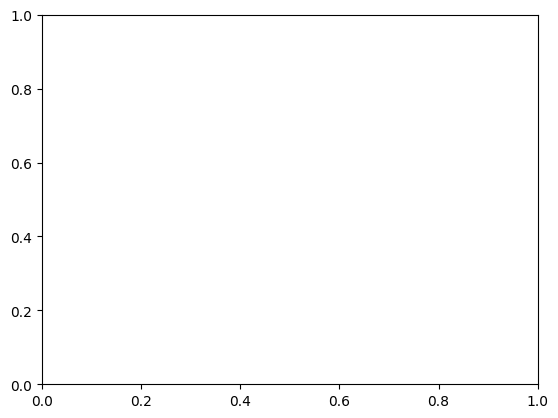

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [88]:
plt.show()

In [61]:
1.05**-5

0.7835261664684589

In [18]:
__get_article_metadata_from_api('6513889f395f46458f8bba9d')

{'articleId': '6513889f395f46458f8bba9d',
 'url': 'https://economictimes.indiatimes.com/tech/startups/harness-the-power-of-industry-5-0-with-the-latest-sector-focussed-mentorship-cohort-of-accel-3-0/articleshow/103578823.cms',
 'title': 'Harness the power of Industry 5.0 with the latest sector-focussed mentorship cohort of Accel 3.0',
 'shortDescription': 'The Industry 5.0 cohort by Accel Atoms 3.0 is set to ignite the pace of startup innovations in the industrial manufacturing space, with a focus on empowering visionary entrepreneurs with the vision to power the future of manufacturing. Join the sector-focussed mentorship cohort to connect with industry experts, tech specialists, researchers, founders as part of the Accel Atoms Industry 5.0 cohort, and glean actionable insights into the evolving human-tech pivot fuelling innovation.',
 'publishedTime': '2023-09-11T17:01:00+05:30',
 'lastUpdatedTime': '2023-09-11T17:01:00+05:30',
 'tags': ['accel',
  'Industry 5.0',
  'Internet of Thin

In [18]:
__get_article_text_from_s3('6513889f395f46458f8bba9d')

{'meta_data': {'is_premium_article': True,
  'title': 'Harness the power of Industry 5.0 with the latest sector-focussed mentorship cohort of Accel 3.0',
  'short_description': 'The Industry 5.0 cohort by Accel Atoms 3.0 is set to ignite the pace of startup innovations in the industrial manufacturing space, with a focus on empowering visionary entrepreneurs with the vision to power the future of manufacturing. Join the sector-focussed mentorship cohort to connect with industry experts, tech specialists, researchers, founders as part of the Accel Atoms Industry 5.0 cohort, and glean actionable insights into the evolving human-tech pivot fuelling innovation.',
  'published_time': '2023-09-11T17:01:00+05:30',
  'last_updated_time': '2023-09-11T17:01:00+05:30',
  'tags': ['accel',
   'Industry 5.0',
   'Internet of Things',
   'Accel 3.0',
   'Accel industry',
   'industry plans'],
  'image_url': 'https://economictimes.indiatimes.com/thumb/msid-103578907,width-1200,height-900,imgsize-23320